In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [79]:
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW 
res = Style.RESET_ALL



In [18]:
train=pd.read_csv(r'E:\Rohan\price_pred\train.csv')
test=pd.read_csv(r'E:\Rohan\price_pred\test.csv')
train

id  carat        cut color clarity  depth  table     x     y   
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  \
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.05  13387  
2       3.50   2772  
3       2.71    666  
4       4.77  14453  
...      ...    ...  
193568  2.67   1130  
193569  3.47   2874  
193570  3.62   3036  
193571  2.81    681  
193572  3.48   2258  

[193573 rows x 11 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


Description of dataset is as follows.

Carat: a weight of the gem. A one “carat” is equivalant 200 milligrams.
Cut:  describes the cut quality of the gem. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color:  refers to the color of the gem. With D being the best and J the worst.
Clarity: refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
Depth:  the height of a gem, measured from the Culet to the table, divided by its average Girdle Diameter.
Table:  the width of the gem's Table expressed as a Percentage of its Average Diameter.
X:  Length of the gem in mm.
Y:  Width of the gem in mm.
Z:  Height of the gem in mm.
Target varibale:

Price:  the Price of the gem.

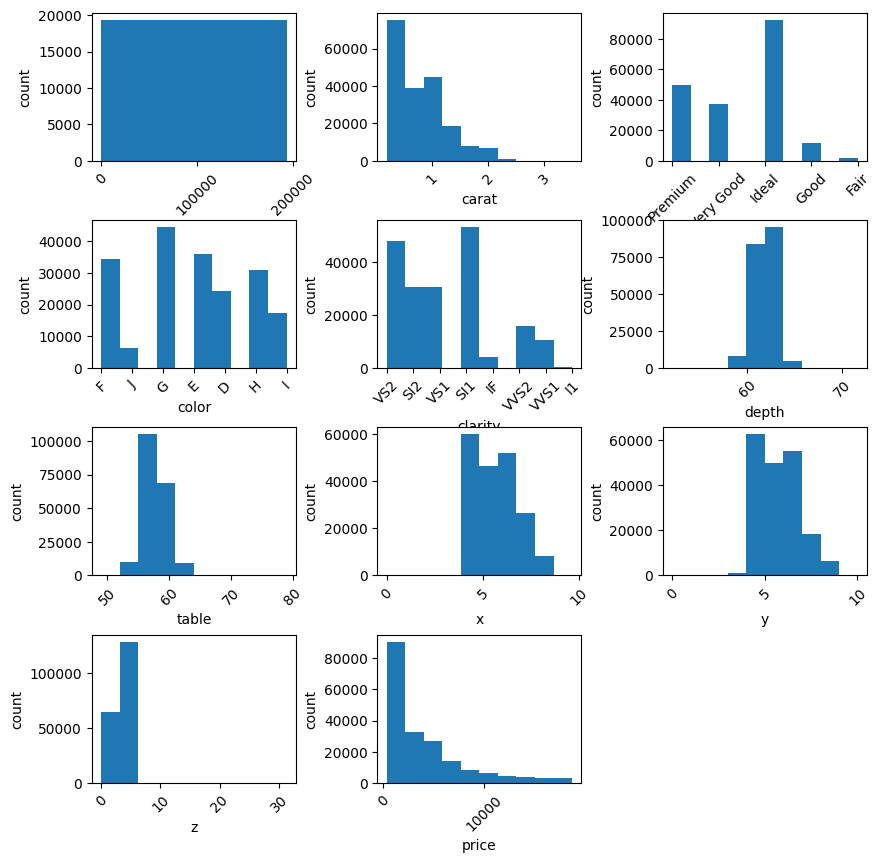

In [6]:

i=1
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for col in train.columns:
    plt.subplot(4,3,i)
    
    plt.hist(train[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    i+=1

In [7]:
# data is imbalnced with no uniform distibution

In [21]:
train.clarity.value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [ ]:
# I1,IF clarity is having few data points
# SI1 is having most observation i.e 53k

In [22]:
train.color.value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [24]:
i1=train[train.clarity=='I1']
i1

id  carat        cut color clarity  depth  table     x     y  \
180        180   1.70       Good     J      I1   63.5   58.0  7.55  7.51   
533        533   1.50       Good     D      I1   63.7   58.0  7.21  7.18   
774        774   1.34    Premium     I      I1   62.8   57.0  7.00  7.01   
933        933   1.01    Premium     F      I1   61.1   57.0  6.43  6.37   
1108      1108   1.50    Premium     D      I1   61.5   62.0  7.39  7.28   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
191454  191454   1.00    Premium     E      I1   60.8   59.0  6.42  6.38   
191870  191870   1.20      Ideal     E      I1   62.2   57.0  6.79  6.73   
192261  192261   1.20      Ideal     E      I1   61.7   56.0  6.82  6.77   
192692  192692   0.55       Good     E      I1   63.7   60.0  5.26  5.18   
192746  192746   1.15  Very Good     G      I1   63.5   54.0  6.64  6.71   

           z  price  
180     4.79   5704  
533     4.58   7592  
774     4.42   3956  
933     3.92   3609  
1108    4.50   6300  
...      ...    ...  
191454  3.89   3450  
191870  4.21   3816  
192261  4.19   3674  
192692  3.31    987  
192746  4.23   3614  

[512 rows x 11 columns]

Text(0.5, 0, 'color for I1')

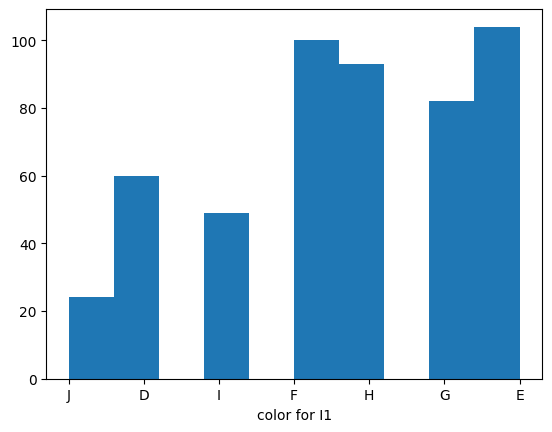

In [30]:
plt.hist(i1.color)
plt.xlabel('color for I1')

<Axes: ylabel='price'>

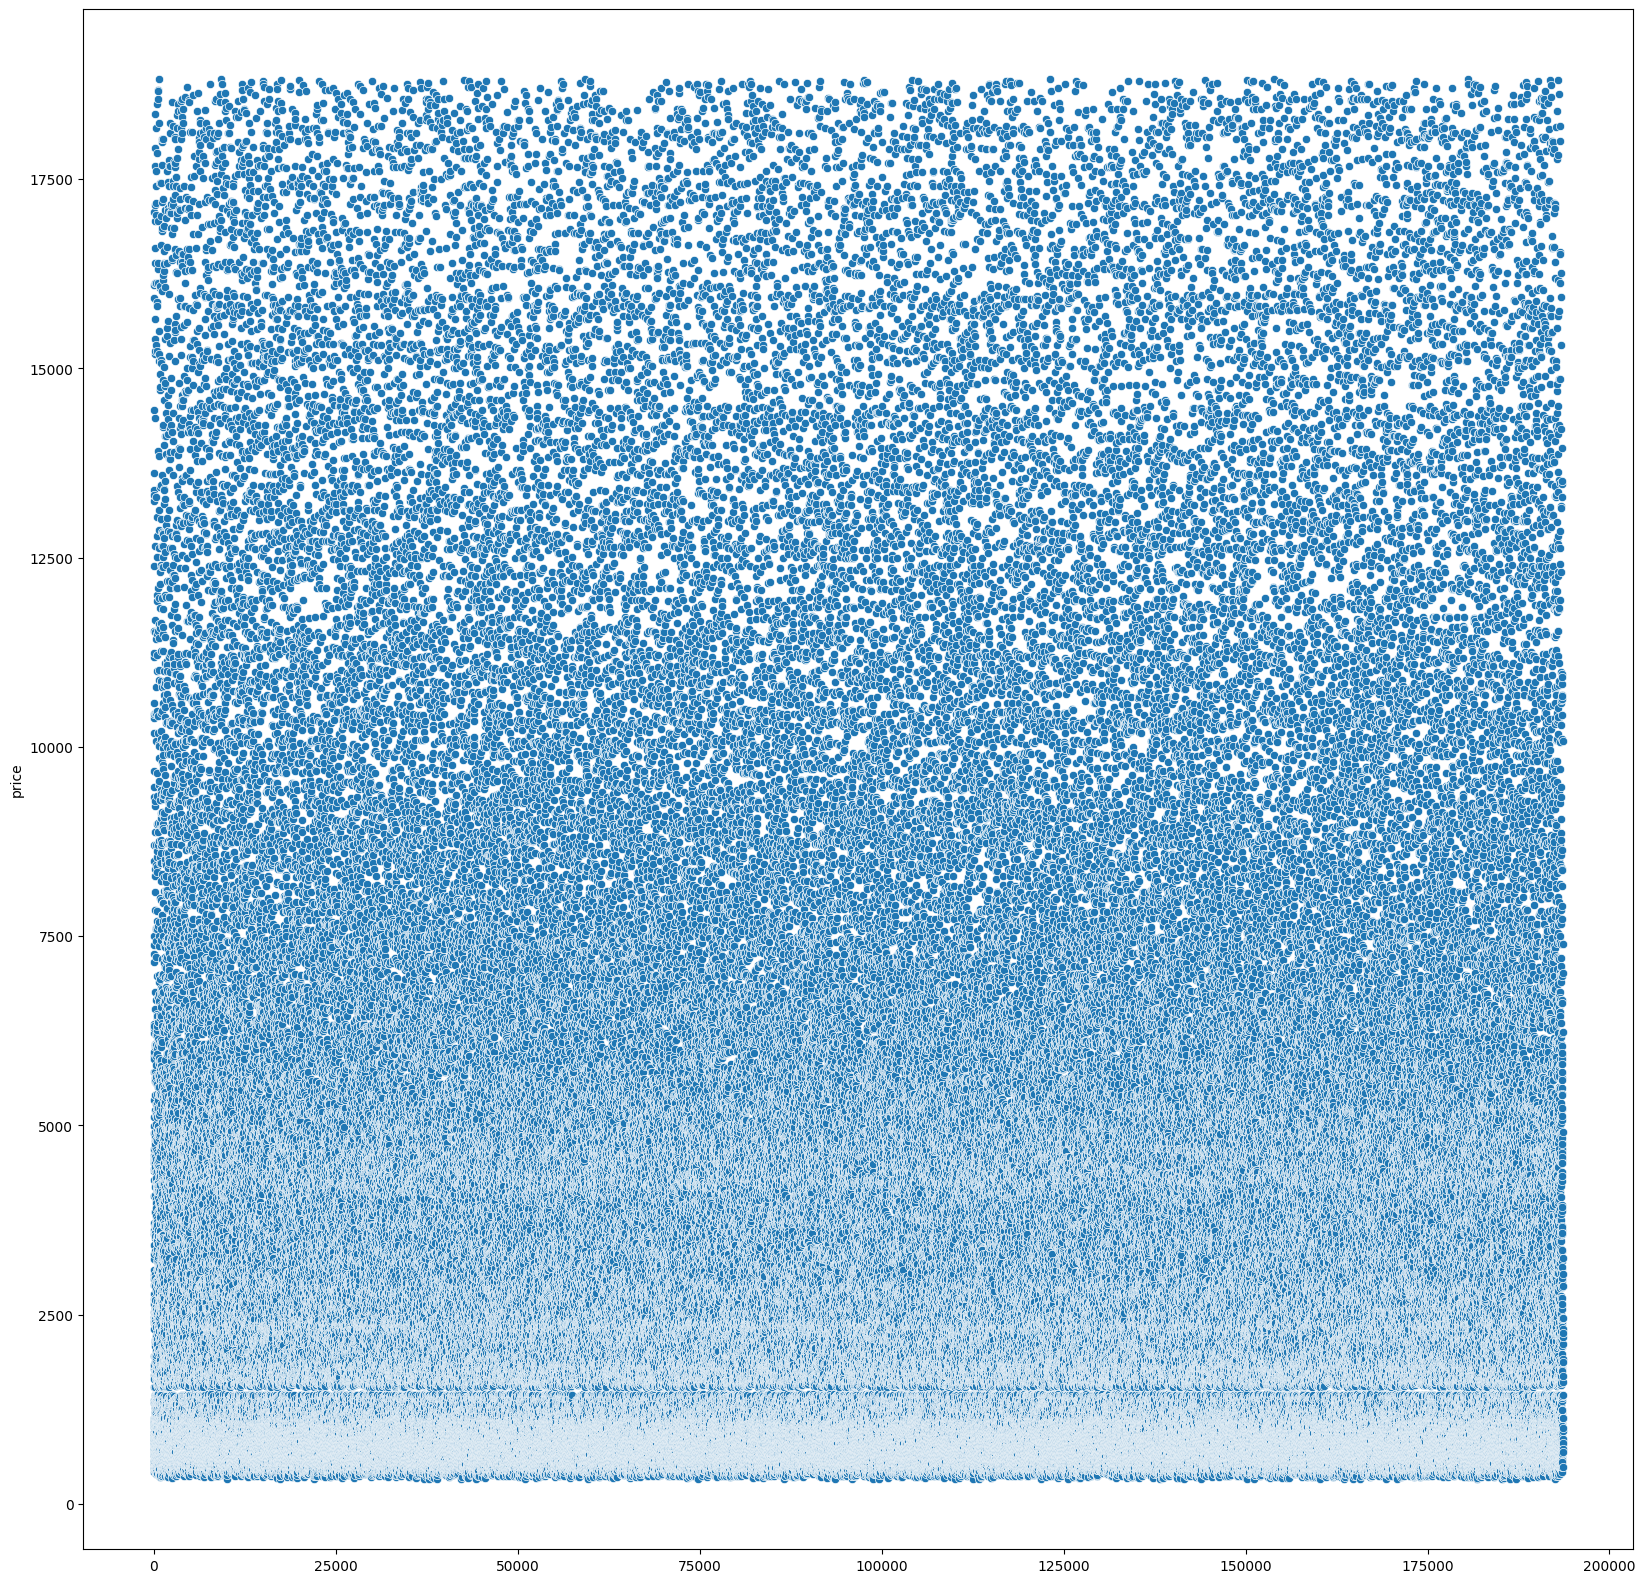

In [52]:
plt.figure(figsize=(20,20))
sns.scatterplot(train.price)

<AxesSubplot: xlabel='clarity', ylabel='Count'>

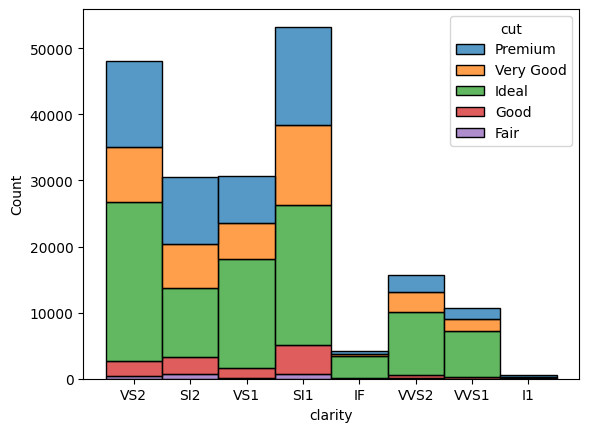

In [12]:
import seaborn as sns
sns.histplot(data=train, x='clarity',hue='cut', multiple="stack")

<AxesSubplot: xlabel='clarity', ylabel='Count'>

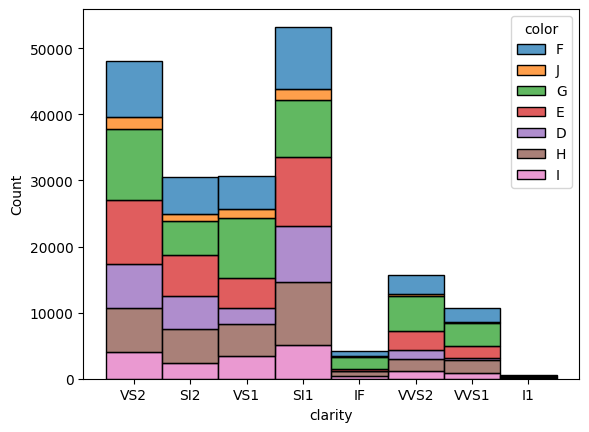

In [13]:
sns.histplot(data=train, x='clarity',hue='color', multiple="stack")

In [44]:
pd.crosstab(train.color, train.clarity).style.background_gradient()

In [45]:
# dataset contains G color is having more observations from all clarity except SI1
# I and J color are having less observation from all clarity


In [42]:
pd.crosstab(train.cut, train.clarity).style.background_gradient()

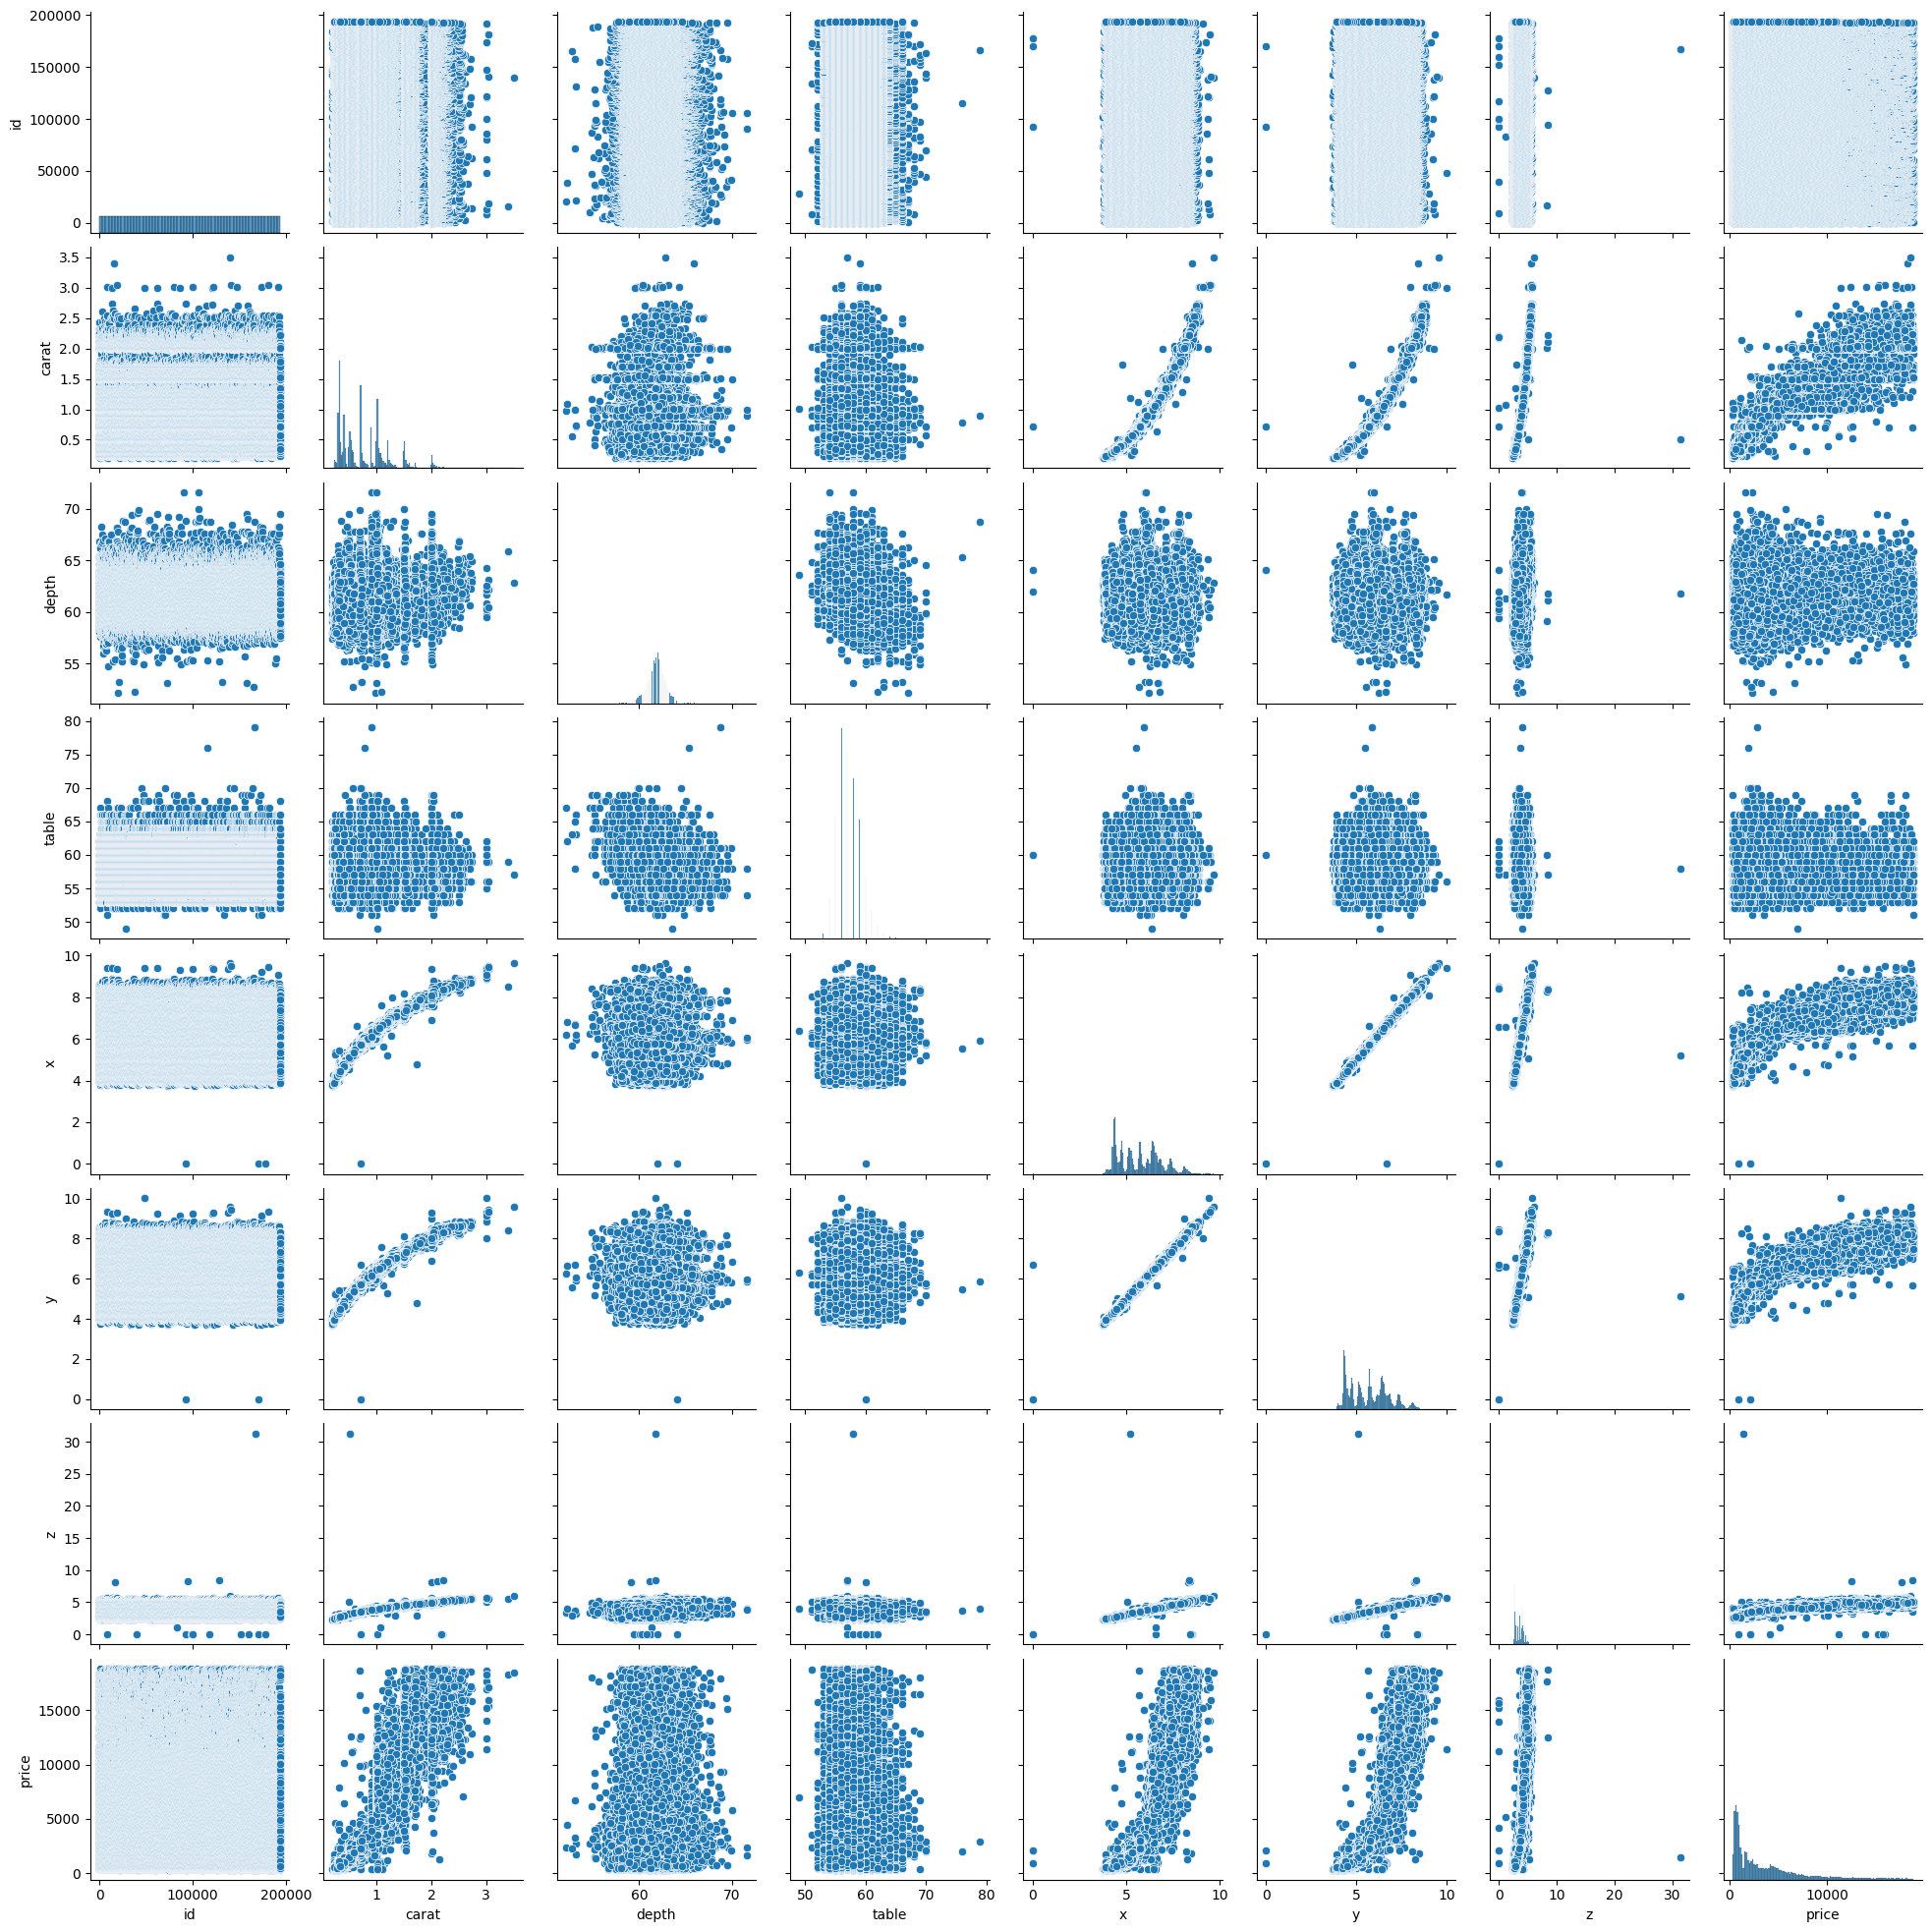

In [18]:
sns.pairplot(train)

/tmp/ipykernel_34/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<AxesSubplot: >

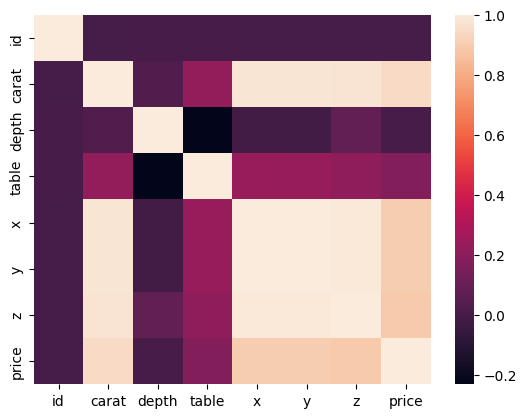

In [19]:
sns.heatmap(train.corr())

In [21]:
# depth and tabel are in inverse corealation where as x,y,z and carat are having strong positive co relation
# x,y,z and carat having strong co relation with price


In [3]:
train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [83]:
Xm=train.drop(['id','price'],axis=1)
Ym=train['price']
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(Xm,Ym,test_size=0.2,random_state=18)



In [10]:
X.shape,x.shape,Y.shape,y.shape

((154858, 9), (38715, 9), (154858,), (38715,))

In [5]:
from sklearn.preprocessing import LabelEncoder
le_cut=LabelEncoder()
le_color=LabelEncoder()
le_clarity=LabelEncoder()

X.cut=le_cut.fit_transform(X.cut)
X.color=le_color.fit_transform(X.color)
X.clarity=le_clarity.fit_transform(X.clarity)

x.cut=le_cut.transform(x.cut)
x.color=le_color.transform(x.color)
x.clarity=le_clarity.transform(x.clarity)




# for i in range(0,X.shape[1]):
#     if X.dtypes[i]=='object':
        
#         X[X.columns[i]] = le.fit_transform(X[X.columns[i]])


In [6]:
X

carat  cut  color  clarity  depth  table     x     y     z
90834    0.80    2      2        2   62.6   55.0  5.92  5.88  3.70
94320    0.33    2      3        1   61.8   56.0  4.45  4.47  2.76
183493   0.35    3      2        7   60.2   57.0  4.55  4.58  2.75
110071   0.43    2      2        4   60.7   57.0  4.90  4.87  2.97
120441   0.41    2      2        5   61.9   57.0  4.76  4.80  2.96
...       ...  ...    ...      ...    ...    ...   ...   ...   ...
1726     1.06    3      2        2   61.8   57.0  6.53  6.57  4.05
35653    0.31    4      3        5   62.5   59.0  4.30  4.33  2.70
91256    0.30    2      3        6   61.6   57.0  4.28  4.30  2.64
94483    0.33    3      5        2   60.9   58.0  4.45  4.51  2.73
191786   1.02    1      3        2   63.1   61.0  6.35  6.32  4.01

[154858 rows x 9 columns]

In [14]:
Y

90834     2976
94320     1030
183493     945
110071    1067
120441    1107
          ... 
1726      5198
35653      544
91256      814
94483      572
191786    4375
Name: price, Length: 154858, dtype: int64

In [13]:
x

carat  cut  color  clarity  depth  table     x     y     z
76331    1.33    2      4        7   62.1   57.0  7.06  7.04  4.38
153029   0.34    2      0        0   61.6   56.0  4.49  4.55  2.78
146804   0.90    1      3        2   63.2   59.0  6.11  6.08  3.86
80716    1.20    2      4        5   61.5   56.0  6.79  6.83  4.19
187970   0.57    4      4        2   60.1   57.0  5.39  5.44  3.26
...       ...  ...    ...      ...    ...    ...   ...   ...   ...
133084   0.40    4      4        2   62.9   58.0  4.75  4.76  2.99
160081   0.41    2      6        4   61.8   55.0  4.75  4.78  2.95
166042   1.36    3      4        5   61.5   58.0  7.12  7.07  4.38
129728   1.24    3      5        2   62.1   60.0  6.85  6.82  4.24
1761     0.70    1      2        5   62.8   57.0  5.61  5.66  3.54

[38715 rows x 9 columns]

In [7]:
# for i in range(0,x.shape[1]):
#     if x.dtypes[i]=='object':
#         try:
#             x[x.columns[i]] = le.transform(x[x.columns[i]])
#         except:
#             pass

In [8]:
x

carat  cut  color  clarity  depth  table     x     y     z
76331    1.33    2      4        7   62.1   57.0  7.06  7.04  4.38
153029   0.34    2      0        0   61.6   56.0  4.49  4.55  2.78
146804   0.90    1      3        2   63.2   59.0  6.11  6.08  3.86
80716    1.20    2      4        5   61.5   56.0  6.79  6.83  4.19
187970   0.57    4      4        2   60.1   57.0  5.39  5.44  3.26
...       ...  ...    ...      ...    ...    ...   ...   ...   ...
133084   0.40    4      4        2   62.9   58.0  4.75  4.76  2.99
160081   0.41    2      6        4   61.8   55.0  4.75  4.78  2.95
166042   1.36    3      4        5   61.5   58.0  7.12  7.07  4.38
129728   1.24    3      5        2   62.1   60.0  6.85  6.82  4.24
1761     0.70    1      2        5   62.8   57.0  5.61  5.66  3.54

[38715 rows x 9 columns]

In [9]:
train.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [13]:
lr.coef_

array([ 1.42074705e+04,  7.18483536e+00, -2.27397444e+02,  2.39403248e+02,
       -1.85988167e+02, -8.28111729e+01, -2.18565747e+03, -9.31061287e+01,
       -8.94158123e+01])

In [7]:
y_pred=lr.predict(x)


In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f"{blu}R2 score for test batch is:{r2_score(y,y_pred)*100:.3f},{gld} Mean Absolute Error is:{mean_absolute_error(y,y_pred):.3f}")

R2 score for test batch is:92.328, Mean Absolute Error is:716.256


In [82]:
import math
math.sqrt(mean_squared_error(y,y_pred))

1117.4801852139956

In [76]:
train_pred=lr.predict(X)

print(f"{blu}R2 score for train batch is:{r2_score(Y,train_pred)*100:.3f},{gld} Mean Absolute Error is:{mean_absolute_error(Y,train_pred):.3f}")

R2 score for train batch is:92.455, Mean Absolute Error is:708.329


In [9]:
y_pred

array([8882.76039843,  218.97615775, 3638.78782441, ..., 8732.21194871,
       6430.41531741, 3143.4648934 ])

In [10]:
submi=pd.read_csv(r'E:\Rohan\price_pred\sample_submission.csv')
submi

id     price
0       193573  3969.155
1       193574  3969.155
2       193575  3969.155
3       193576  3969.155
4       193577  3969.155
...        ...       ...
129045  322618  3969.155
129046  322619  3969.155
129047  322620  3969.155
129048  322621  3969.155
129049  322622  3969.155

[129050 rows x 2 columns]

In [20]:
test_id=test.id
test_id

0         193573
1         193574
2         193575
3         193576
4         193577
           ...  
129045    322618
129046    322619
129047    322620
129048    322621
129049    322622
Name: id, Length: 129050, dtype: int64

In [23]:
test.id.value_counts().max()

1

In [12]:
test.cut=le_cut.transform(test.cut)
test.color=le_color.transform(test.color)
test.clarity=le_clarity.transform(test.clarity)
test

id  carat  cut  color  clarity  depth  table     x     y     z
0       193573   0.35    2      0        5   62.3   56.0  4.51  4.54  2.82
1       193574   0.77    4      2        3   62.8   56.0  5.83  5.87  3.68
2       193575   0.71    2      5        5   61.9   53.0  5.77  5.74  3.55
3       193576   0.33    2      3        7   61.6   55.0  4.44  4.42  2.73
4       193577   1.20    4      5        5   62.7   56.0  6.75  6.79  4.24
...        ...    ...  ...    ...      ...    ...    ...   ...   ...   ...
129045  322618   0.72    2      0        7   62.0   56.0  5.75  5.78  3.57
129046  322619   0.70    3      0        2   59.6   62.0  5.77  5.74  3.43
129047  322620   1.01    3      3        7   62.3   58.0  6.44  6.41  4.01
129048  322621   1.35    2      0        0   62.0   56.0  7.05  7.08  4.38
129049  322622   1.07    3      4        3   62.6   60.0  6.49  6.45  4.06

[129050 rows x 10 columns]

In [15]:
test=test.drop(['id'],axis=1)

In [16]:
test

carat  cut  color  clarity  depth  table     x     y     z
0        0.35    2      0        5   62.3   56.0  4.51  4.54  2.82
1        0.77    4      2        3   62.8   56.0  5.83  5.87  3.68
2        0.71    2      5        5   61.9   53.0  5.77  5.74  3.55
3        0.33    2      3        7   61.6   55.0  4.44  4.42  2.73
4        1.20    4      5        5   62.7   56.0  6.75  6.79  4.24
...       ...  ...    ...      ...    ...    ...   ...   ...   ...
129045   0.72    2      0        7   62.0   56.0  5.75  5.78  3.57
129046   0.70    3      0        2   59.6   62.0  5.77  5.74  3.43
129047   1.01    3      3        7   62.3   58.0  6.44  6.41  4.01
129048   1.35    2      0        0   62.0   56.0  7.05  7.08  4.38
129049   1.07    3      4        3   62.6   60.0  6.49  6.45  4.06

[129050 rows x 9 columns]

In [17]:
test_pred=lr.predict(test)

In [29]:
type(test_pred)

numpy.ndarray

In [30]:
submission=pd.concat([test_id,pd.Series(test_pred)],axis=1)
submission

id            0
0       193573  1381.516664
1       193574  3250.631868
2       193575  2751.118300
3       193576  1279.200489
4       193577  7028.521798
...        ...          ...
129045  322618  4280.154974
129046  322619  2728.208034
129047  322620  5897.791654
129048  322621  8520.219169
129049  322622  5226.332743

[129050 rows x 2 columns]